<a href="https://colab.research.google.com/github/KARTHIKEYAN-31/Masters_Project/blob/main/Capstone_Project_6/Capstone_Project_ML_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Book Recommendation System



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** - Karthikeyan

# **Project Summary -**

**Project Title:** Book Recommendation System

**Project Summary:**  
The Book Recommendation System project was designed to explore various recommender system methodologies using real-world book datasets. The end goal was to create intelligent models capable of offering personalized book recommendations based on user behavior and item features.

The project began with **data acquisition**, where book metadata, user ratings, and interactions were compiled and cleaned for exploratory analysis. **Data wrangling** was a critical phase, involving handling missing values, merging datasets, and reshaping data structures to align with analytical goals.

**Data visualization** was conducted to uncover patterns, correlations, and user engagement metrics. Visual storytelling revealed insights such as the distribution of user ratings, most active users, popular books, and sparsity of the rating matrix. These insights laid the foundation for **hypothesis testing**—such as verifying if popular books received significantly higher average ratings or if user preferences clustered by genre or rating behavior.

Next came **feature engineering and data pre-processing**, including normalization, encoding categorical variables, and reducing dimensionality to prepare the dataset for modeling.

The recommendation phase included building and evaluating four key systems:
- **Popularity-Based Recommendation System:** Recommended top-rated and frequently reviewed books regardless of user identity, serving as a strong baseline.
- **Item-Based Collaborative Filtering:** Computed similarity between books using cosine similarity and suggested books similar to a given title based on user co-ratings.
- **User-Based Collaborative Filtering:** Recommended books by identifying users with similar rating patterns and inferring preferences through neighbor behavior.
- **K-Nearest Neighbors (KNN) Model:** Applied using a user-item matrix to find nearest neighbors and deliver personalized suggestions.

Each model's performance was evaluated using intuitive metrics and use-case alignment, with thoughtful consideration given to trade-offs between accuracy, interpretability, and scalability.

In conclusion, the Book Recommendation System not only showcased practical applications of data science techniques but also highlighted the real-world potential of machine learning in enhancing user engagement through personalization.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import scipy.stats as stats
import re
from PIL import Image
import requests
import random
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn import model_selection

### Dataset Loading

In [ ]:
# Load Dataset

books = pd.read_csv("https://drive.google.com/uc?id=165LdNuFwNe7jL7kpPDD7186fUugVYhja")
ratings = pd.read_csv("https://drive.google.com/uc?id=1phmZ4_TzhGi40dPPU_bN_Mz8Bxlhe4d9")
users = pd.read_csv("https://drive.google.com/uc?id=1-XGfI1IND2XPeVX-j6d6srYA4EByAZaG")

### Dataset First View

In [ ]:
# Dataset First Look
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print("No. of Rows in books:",books.shape[0], "No. of Columns in books:",books.shape[1])
print("No. of Rows in ratings:",ratings.shape[0], "No. of Columns in ratings:",ratings.shape[1])
print("No. of Rows in users:",users.shape[0], "No. of Columns in users:",users.shape[1])

No. of Rows in books: 271360 No. of Columns in books: 8
No. of Rows in ratings: 1149780 No. of Columns in ratings: 3
No. of Rows in users: 278858 No. of Columns in users: 3


### Dataset Information

In [ ]:
# Dataset Info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
# Visualizing the missing values

### What did you know about your dataset?

The Book-Crossing dataset comprises 3 files.
* Users :
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values. The Dataset contains 278858 rows and 3 coulmns.
* Books :
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website. The dataset contains 271360 rows and 8 columns.
* Ratings :
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0. The dataset contains 1149780 rows and 3 columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
users.columns, books.columns, ratings.columns

(Index(['User-ID', 'Location', 'Age'], dtype='object'),
 Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
        'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
       dtype='object'),
 Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object'))

In [ ]:
# Dataset Describe

users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [ ]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,020130998X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/006091985X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Variables Description

The Book-Crossing dataset comprises 3 files.
* Users :
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values. The Dataset contains 278858 rows and 3 coulmns.
* Books :
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website. The dataset contains 271360 rows and 8 columns.
* Ratings :
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0. The dataset contains 1149780 rows and 3 columns.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in users:
  print(i, users[i].nunique())

User-ID 278858
Location 57339
Age 165


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# normalize columns name
books.columns= books.columns.str.strip().str.lower().str.replace('-', '_')
users.columns= users.columns.str.strip().str.lower().str.replace('-', '_')
ratings.columns= ratings.columns.str.strip().str.lower().str.replace('-', '_')

In [ ]:
# Write your code to make your dataset analysis ready.

def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [ ]:
missing_values(users)

,index,Missing Values,% of Total Values,Data_type
0,age,110762,39.72,float64
1,user_id,0,0.00,int64
2,location,0,0.00,object


In [ ]:
# replacing nan with average of 'age'
users['age'].fillna((users['age'].mean()), inplace=True)

In [ ]:
missing_values(books)

,index,Missing Values,% of Total Values,Data_type
0,isbn,0,0.0,object
1,book_title,0,0.0,object
2,book_author,2,0.0,object
3,year_of_publication,0,0.0,object
4,publisher,2,0.0,object
5,image_url_s,0,0.0,object
6,image_url_m,0,0.0,object
7,image_url_l,3,0.0,object


In [ ]:
books.drop(['image_url_s', 'image_url_m', 'image_url_l'], axis=1, inplace=True)
books.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication',
       'publisher'],
      dtype='object')

In [ ]:
books.dropna(inplace = True)

In [ ]:
missing_values(ratings)

,index,Missing Values,% of Total Values,Data_type
0,user_id,0,0.0,int64
1,isbn,0,0.0,object
2,book_rating,0,0.0,int64


In [ ]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings[ratings.isbn.isin(ratings.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
data = ratings.merge(books, on="isbn").merge(users, on="user_id")

### What all manipulations have you done and insights you found?

* Replaced missing values of age in users data with mean,
* Drop null values in ratings and books as those were less in numbers.
* Normalizing the column name.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Top authours by number of books

Text(0.5, 1.0, 'Top 20 author with number of books')

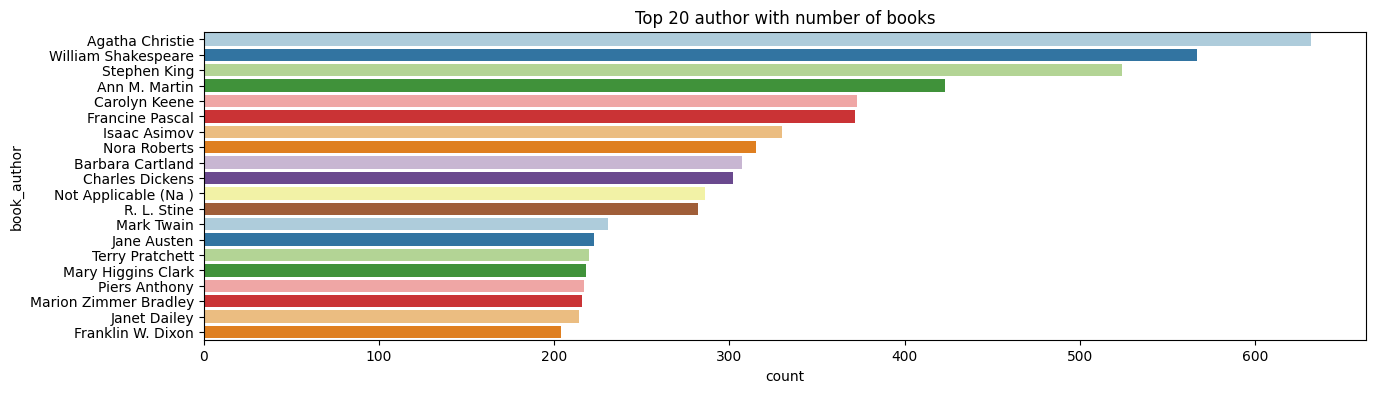

In [ ]:
# Books data -

plt.figure(figsize=(15,4))
sns.countplot(y="book_author",palette = 'Paired', data=books,order=books['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

##### 1. Why did you pick the specific chart?

To view the authors with most number of books.

##### 2. What is/are the insight(s) found from the chart?

Agatha Christie has most number of books. And other authors were following them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, to get to now the most popular author by number of books he/she wrote.

#### Chart - 2 Top Publications

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

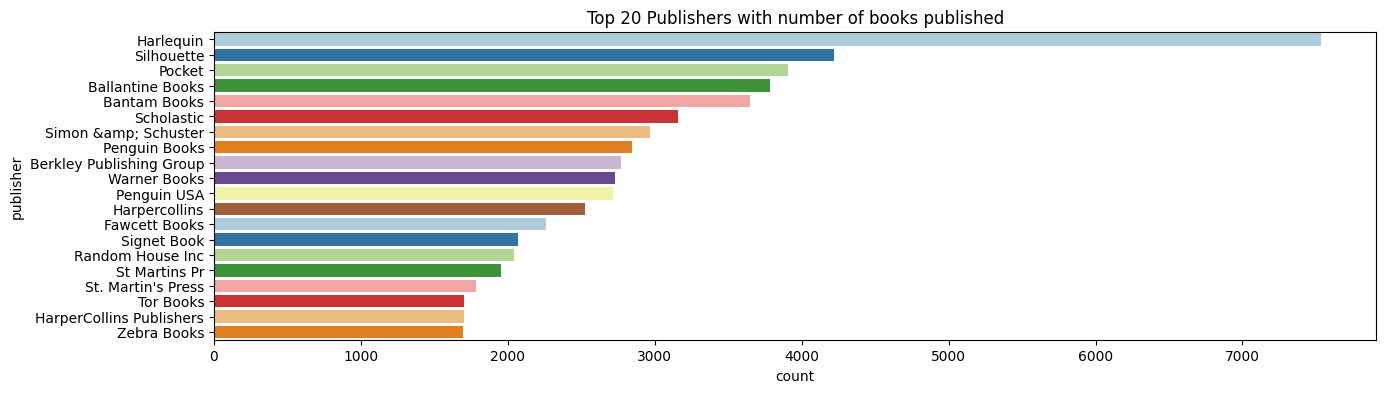

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(y="publisher",palette = 'Paired', data=books,order=books['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

##### 1. Why did you pick the specific chart?

To know about the publications. Analysis which publication had published most number of books.

##### 2. What is/are the insight(s) found from the chart?

Harlequin has most number of books published.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, It helps to find the most popular publications.

#### Chart - 3 Books published by year

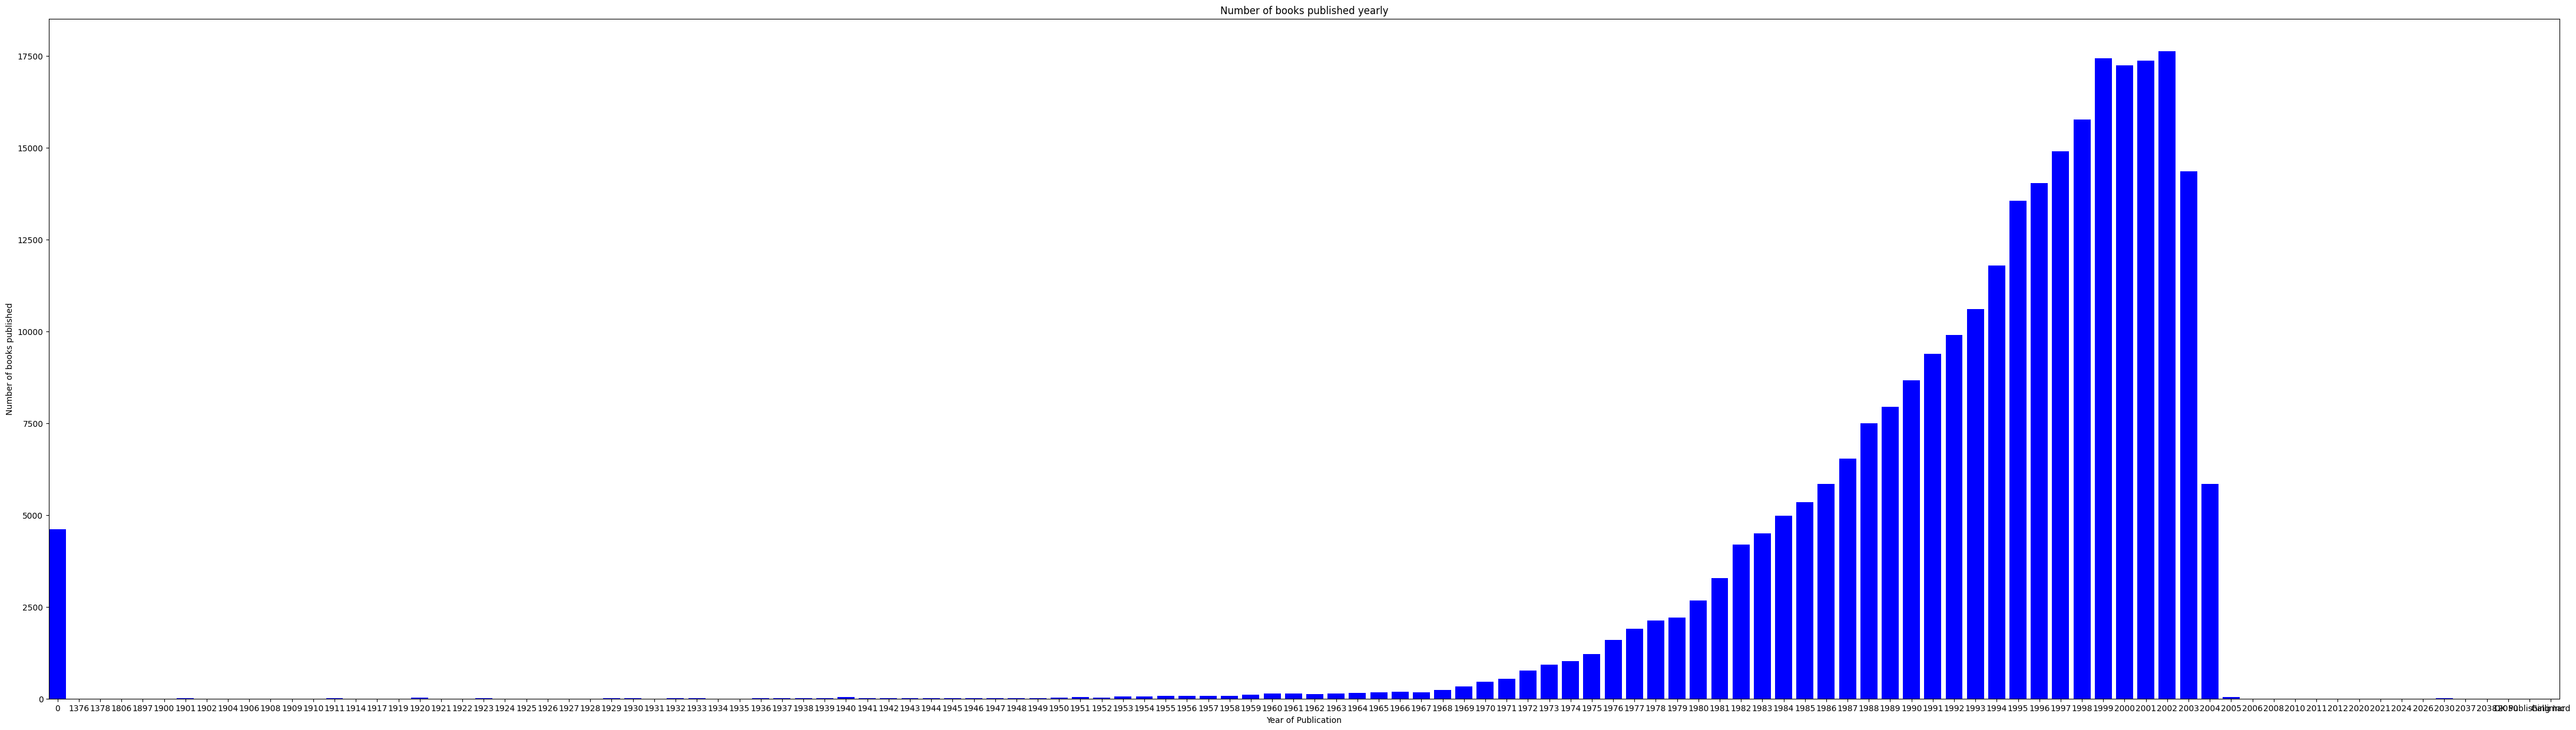

In [ ]:

publications = {}
for year in books['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

##### 1. Why did you pick the specific chart?

To get to know about the age of books and collection of books by year.

##### 2. What is/are the insight(s) found from the chart?

Most books were published between 1990 and 2004.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, to analysis users preference by books release year.

#### Chart - 4: Age Distributins

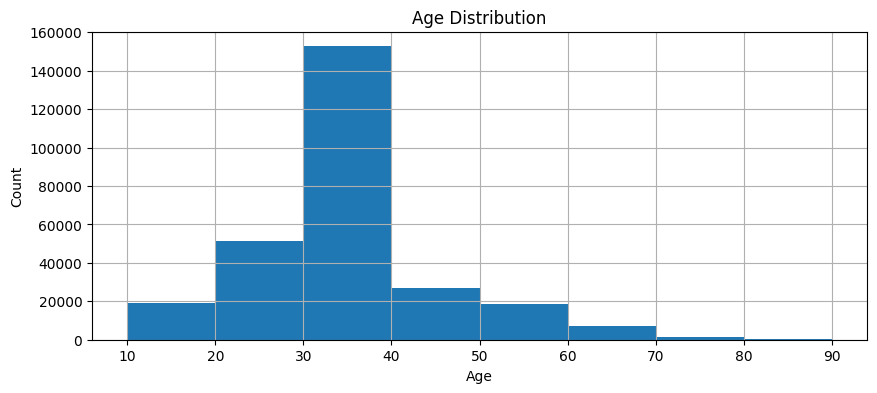

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(10,4))
users.age.hist(bins=[10*i for i in range(1, 10)])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

As Bar chart is easy to visualize distribution of age as bins.

##### 2. What is/are the insight(s) found from the chart?

Users were mostly from the age between 20 to 50

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, To Age based book recommendation

#### Chart - 5 Top countries by count of users

Text(0.5, 1.0, 'Count of users Country wise')

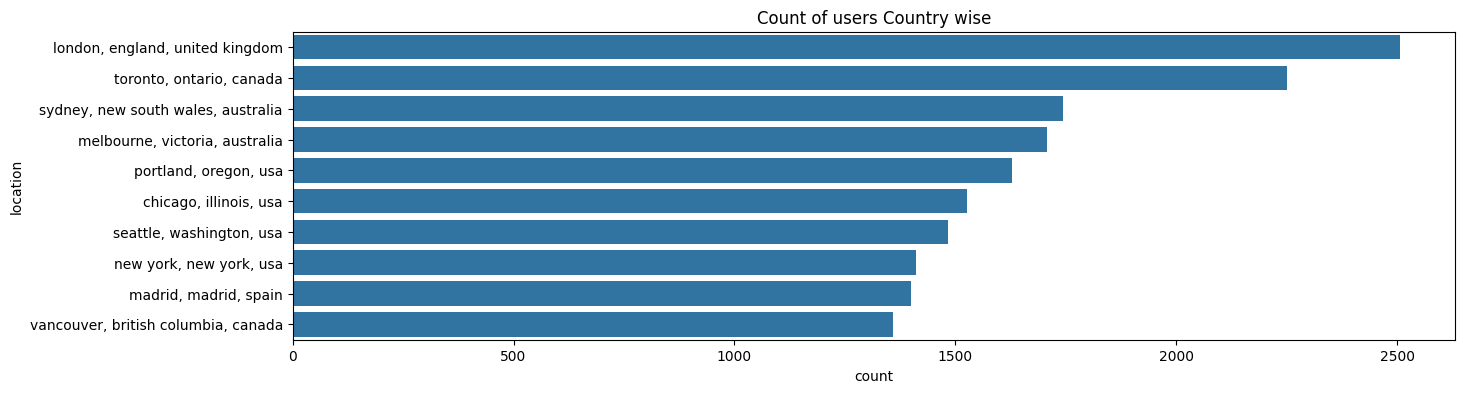

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(15,4))
sns.countplot(y='location',data=users,order=pd.value_counts(users['location']).iloc[:10].index)
plt.title('Count of users Country wise')

##### 1. Why did you pick the specific chart?

Bar chart is easy to visualize top count of a dimension

##### 2. What is/are the insight(s) found from the chart?

Most of users were from london, toronto, sydney.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, to recommend the books for users based on their location. And manage books based on locaiotn

#### Chart - 6 - Top rated books

In [ ]:
# Chart - 6 visualization code
import plotly.express as px


x_df = ratings.groupby('isbn')['book_rating'].agg(['count', 'mean'])
x_df = x_df[x_df['count']>100]
x_df.sort_values('mean', ascending=False, inplace=True)

px.bar(x_df.reset_index().head(10), y = 'isbn', x = 'mean')



##### 1. Why did you pick the specific chart?

To view the book which has max ratings with minimum 100 ratings.

##### 2. What is/are the insight(s) found from the chart?

only few books have an average rating above 6.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes to identify best rated books by different users and share it to similar user. Which helps in increase user experience

#### Chart - 7 - count of unique ratings

<Axes: xlabel='book_rating', ylabel='count'>

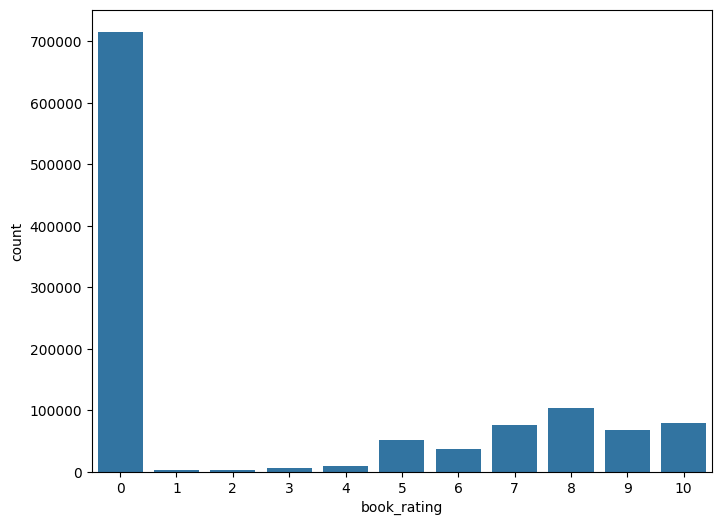

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",data= unique_ratings)

##### 1. Why did you pick the specific chart?

To view count of each unique ratings.

##### 2. What is/are the insight(s) found from the chart?

* This countplot shows users have rated 0 the most, which means they haven't rated books at all.
* Still we can see pattern to recognize in ratings from 1-10.
* Mostly the users have rated 8 ratings out of 10 as per books. It might happen that the feedback is positive but not extremely positive as 10 ratings (i.e best books ever).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes to identity the rating which is consider as best.

#### Chart - 8 - Explicit ratings

Text(0.5, 1.0, 'Explicit Ratings')

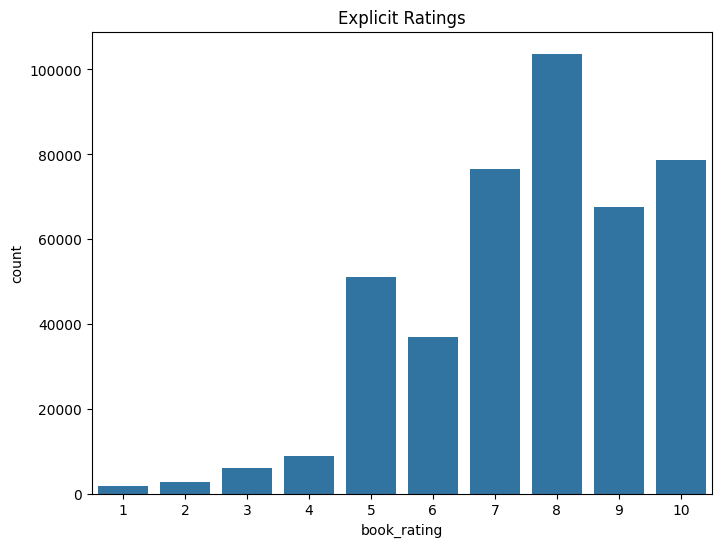

In [ ]:
# Chart - 8 visualization code
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating", data=rate_data)
plt.title("Explicit Ratings")

##### 1. Why did you pick the specific chart?

This countplot of bookRating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times.

##### 2. What is/are the insight(s) found from the chart?

* Let's take ratings group from 1-4. This can be negative impact for books been published if they have ratings from 1 to 4. It can be issues related to - 1. Language 2. Offend by any chapter's incident/paragraph/Author 3. They've read worst book ever.

* If we think analytical about rating 5, it might happen some same reason as above key points mention.

* For 5 ratings the users might not sure about book ratings whether it's positive or negative impact.

* Let's take ratings group from 6-10. This are positive feedback - 1. It can happen that not every book is perfect in all desire. So, the user's have decided to rate 8.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, to idenity the range of ratings as positive or nevative.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Users of different age groups give significantly different ratings

* Book publication year affects ratings

* Certain publishers have significantly different average ratings

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in the average book ratings given by different age groups.

Alternate Hypothesis (H₁): There is a significant difference in the average book ratings given by different age groups.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
age_groups = pd.cut(data["age"], bins=[0, 18, 30, 50, 100], labels=["Teen", "Young Adult", "Adult", "Senior"])
data["age_group"] = age_groups

teen_ratings = data[data["age_group"] == "Teen"]["book_rating"]
adult_ratings = data[data["age_group"] == "Adult"]["book_rating"]

t_stat, p_value = stats.ttest_ind(teen_ratings.dropna(), adult_ratings.dropna())
print(f"Hypothesis 1 - T-test results: t-statistic = {t_stat}, p-value = {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Age groups have different rating preferences.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings.")

Hypothesis 1 - T-test results: t-statistic = 31.123729015491488, p-value = 1.618132722597911e-212
Reject the null hypothesis: Age groups have different rating preferences.


##### Which statistical test have you done to obtain P-Value?

t-test

##### Why did you choose the specific statistical test?

This test was used to compare the average book ratings between different age groups (e.g., Teens vs. Adults). The p-value obtained from the t-test helps determine whether the difference in average ratings between these age groups is statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in the average book ratings across different publication years.

Alternate Hypothesis (H₁): There is a significant difference in the average book ratings based on the publication year.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Group ratings by publication year
year_groups = data.groupby("year_of_publication")["book_rating"].apply(list)

# Perform ANOVA test
anova_stat, p_value = stats.f_oneway(*year_groups)

print(f"Hypothesis 2 - ANOVA results: F-statistic = {anova_stat}, p-value = {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Publication years impact ratings.")
else:
    print("Fail to reject the null hypothesis: No significant effect.")


Hypothesis 2 - ANOVA results: F-statistic = 20.709523952175786, p-value = 0.0
Reject the null hypothesis: Publication years impact ratings.


##### Which statistical test have you done to obtain P-Value?

ANOVA

##### Why did you choose the specific statistical test?

ANOVA is used when comparing the means of three or more independent groups.

Since publication years form distinct categories, ANOVA determines if at least one year differs significantly.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in the average book ratings across different publishers.

Alternate Hypothesis (H₁): There is a significant difference in the average book ratings based on the publisher.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Group ratings by publisher
publisher_groups = data.groupby("publisher")["book_rating"].apply(list)

# Perform ANOVA test
anova_stat, p_value = stats.f_oneway(*publisher_groups)

print(f"Hypothesis 3 - ANOVA results: F-statistic = {anova_stat}, p-value = {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Publishers influence book ratings.")
else:
    print("Fail to reject the null hypothesis: No significant impact.")


Hypothesis 3 - ANOVA results: F-statistic = 3.0681256950449534, p-value = 0.0
Reject the null hypothesis: Publishers influence book ratings.


##### Which statistical test have you done to obtain P-Value?

ANOVA

##### Why did you choose the specific statistical test?

Similar to the previous hypothesis, publishers form distinct groups.

ANOVA helps determine whether the mean rating varies significantly among different publishers.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Extract new data set of books with ratings by excluding ratings with 0 as those mentions no ratings

In [ ]:
# Transform Your data
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]   # implicit ratings represented by 0

# Merging book_data dataset and ratings_explicit
new_book_df= pd.merge(books, ratings_explicit, on='isbn')
new_book_df.head()

data = pd.merge(new_book_df, users, on='user_id')
data.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",34.751434
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8,"n/a, n/a, n/a",34.751434
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8,"toronto, ontario, canada",30.000000
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9,"ottawa, ,",34.751434
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9,"kingston, ontario, canada",34.751434


### 6. Data Scaling

In [ ]:
# Scaling your data



##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
train_data, test_data = model_selection.train_test_split(new_book_df, test_size=0.30)

##### What data splitting ratio have you used and why?

30 % As it is the standard test size if no validation dataset required.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
df = data.copy()

### Popularity based Recommendation System.

In [ ]:
def popular_books(df,n=100):
    rating_count=df.groupby("book_title").count()["book_rating"].reset_index()
    rating_count.rename(columns={"book_rating":"NumberOfVotes"},inplace=True)

    rating_average=df.groupby("book_title")["book_rating"].mean().reset_index()
    rating_average.rename(columns={"book_rating":"AverageRatings"},inplace=True)

    popularBooks=rating_count.merge(rating_average,on="book_title")

    def weighted_rate(x):
        v=x["NumberOfVotes"]
        R=x["AverageRatings"]

        return ((v*R) + (m*C)) / (v+m)

    C=popularBooks["AverageRatings"].mean()
    m=popularBooks["NumberOfVotes"].quantile(0.90)

    popularBooks=popularBooks[popularBooks["NumberOfVotes"] >=250]
    popularBooks["Popularity"]=popularBooks.apply(weighted_rate,axis=1)
    popularBooks=popularBooks.sort_values(by="Popularity",ascending=False)
    return popularBooks[["book_title","NumberOfVotes","AverageRatings","Popularity"]].reset_index(drop=True).head(n)

In [ ]:
n=10
top_ten=pd.DataFrame(popular_books(data,10))
top_ten

,book_title,NumberOfVotes,AverageRatings,Popularity
0,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,9.016361
1,To Kill a Mockingbird,267,8.977528,8.950786
2,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,8.914418
3,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,8.820585
4,"Tuesdays with Morrie: An Old Man, a Young Man,...",250,8.588000,8.567113
5,The Secret Life of Bees,406,8.477833,8.466213
6,The Da Vinci Code,494,8.439271,8.430088
7,The Lovely Bones: A Novel,707,8.185290,8.180637
8,The Red Tent (Bestselling Backlist),383,8.182768,8.174262
9,Where the Heart Is (Oprah's Book Club (Paperba...,295,8.142373,8.132046


### Item Based recommendation system

In [ ]:
df.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'user_id', 'book_rating', 'location', 'age'],
      dtype='object')

In [ ]:
rating_count=pd.DataFrame(df["book_title"].value_counts()).reset_index()
# print(rating_count)
rare_books=rating_count[rating_count["count"]<=50]['book_title']
common_books = df.loc[~df["book_title"].isin(rare_books)]
user_book_df =common_books.pivot_table(index=["user_id"],columns=["book_title"],values="book_rating")


In [ ]:

def item_based(bookTitle):
    bookTitle=str(bookTitle)

    if bookTitle in df["book_title"].values:

        if bookTitle in rare_books:
            most_common=pd.Series(common_books["book_title"].unique()).sample(3).values
            print("No Recommendations for this Book ☹️ \n ")
            print("YOU MAY TRY: \n ")
            print("{}".format(most_common[0]), "\n")
            print("{}".format(most_common[1]), "\n")
            print("{}".format(most_common[2]), "\n")
        else:
            book_name=user_book_df [bookTitle]
            book_name.sort_values(ascending=False)
            user_book_df.corrwith(book_name).sort_values(ascending=False).head()
            rec_book=user_book_df.corrwith(book_name).sort_values(ascending=False).head()
            rec_book_list=list(rec_book.index)
            df_author=df[["book_title","book_author"]]
            x_df = df_author.loc[df_author["book_title"].isin(rec_book_list)]
            x_df = x_df.drop_duplicates(subset=["book_author","book_author"], keep="first")
            # print(x_df)
            return(x_df)
    else:
        print("❌ COULD NOT FIND ❌")

In [ ]:
print(item_based("Me Talk Pretty One Day"))

                                               book_title      book_author
21990   Anne of Green Gables (Anne of Green Gables Nov...  L.M. MONTGOMERY
31769       The Dress Lodger (Ballantine Reader's Circle)     Sheri Holman
42144   Eats, Shoots &amp; Leaves: The Zero Tolerance ...      Lynne Truss
53320   Tribulation Force: The Continuing Drama of Tho...       Tim LaHaye
58844                                The Valley of Horses     JEAN M. AUEL
154786  Anne of Green Gables (Anne of Green Gables Nov...  L.M. Montgomery
199853                               The Valley of Horses     Jean M. Auel


In [ ]:
# Visualizing evaluation Metric Score chart

### User Based Recommendation

In [ ]:
random_user = np.random.choice(user_book_df.index)
random_user

np.int64(209683)

In [ ]:
random_user_df = user_book_df[user_book_df.index == random_user]
books_read = random_user_df.columns[random_user_df.notna().any()].tolist()
books_read_df = user_book_df[books_read]
# books_read_df

In [ ]:
user_book_count = books_read_df.T.notnull().sum()
user_book_count = user_book_count.reset_index()
user_book_count.columns = ["User-ID", "Book-Count"]
# user_book_count

In [ ]:
perc = len(books_read) * 60 / 100
users_same_books = user_book_count[user_book_count["Book-Count"] >= perc]["User-ID"]
# users_same_books

In [ ]:
final_df = pd.concat([books_read_df[books_read_df.index.isin(users_same_books)], random_user_df[books_read]]).reset_index().drop_duplicates().set_index("user_id")
# final_df

In [ ]:
def manual_correlation_matrix(df):
    col_names = df.columns
    corr_matrix = pd.DataFrame(index=col_names, columns=col_names)

    for col1 in col_names:
        for col2 in col_names:
            x_mean = np.mean(df[col1])
            y_mean = np.mean(df[col2])
            diff = abs(10 - abs(x_mean - y_mean))/10

            corr_matrix.loc[col1, col2] = diff

    return corr_matrix.astype(float)

In [ ]:
corr_df = manual_correlation_matrix(final_df.T).unstack().sort_values()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ["user_id_1", "user_id_2"]
corr_df = corr_df.reset_index()
corr_df

,user_id_1,user_id_2,corr
0,56399,161870,0.3
1,96493,161870,0.3
2,86959,161870,0.3
3,78438,161870,0.3
4,114016,161870,0.3
...,...,...,...
5179,178199,3939,1.0
5180,235884,78438,1.0
5181,235884,56399,1.0
5182,178199,11676,1.0


In [ ]:
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] > 0.50)][["user_id_2", "corr"]].reset_index(drop=True)
top_users = top_users.sort_values(by="corr", ascending=False).drop_duplicates()
top_users.rename(columns={"user_id_2": "user_id"}, inplace=True)
top_users

,user_id,corr
61,149483,1.0
60,151795,1.0
59,171118,1.0
58,177432,1.0
57,178199,1.0
...,...,...
2,37512,0.7
3,175278,0.7
4,147835,0.7
0,271792,0.6


In [ ]:
final = top_users.merge(ratings[["user_id", "isbn", "book_rating"]], how="inner")
top_users_ratings = final[final["user_id"] != random_user]

In [ ]:
top_users_ratings["weighted_rating"] = top_users_ratings["corr"] * top_users_ratings["book_rating"]
recommendation_df = top_users_ratings.groupby("isbn").agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df.sort_values("weighted_rating", ascending=False).head()

,isbn,weighted_rating
25811,ISBN068481039,10.0
25827,X000000000,10.0
25803,B0000DYXID,10.0
25801,B00006JO2X,10.0
25815,O316666343,10.0


In [ ]:
# Top 5 recommended books

books_to_read = pd.merge(recommendation_df, books, on="isbn")
books_to_read.sort_values("weighted_rating", ascending=False).head()

,isbn,weighted_rating,book_title,book_author,year_of_publication,publisher
5841,0380977311,10.0,"Exit Wounds : A Novel of Suspense (Jance, Ja)",J. A. Jance,2003,William Morrow
15011,0698113608,10.0,The Legend of the Indian Paintbrush,Tomie dePaola,1996,PaperStar Book
15012,0698113993,10.0,Berlioz the Bear,Jan Brett,1996,Putnam Publishing Group
3176,0312979398,10.0,The Eye of the Tiger,Wilbur Smith,2001,St. Martin's Paperbacks
3181,0312979649,10.0,The Beach Club : A Novel,Elin Hilderbrand,2001,St. Martin's Paperbacks


### KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine')
model.fit(user_book_df.T.fillna(0).values)

NearestNeighbors(metric='cosine')

In [ ]:
def get_recommends(title = ""):
  try:
    book = user_book_df.T.fillna(0).loc[title]
  except KeyError as e:
    print('The given book', e, 'does not exist')
    return

  distance, indice = model.kneighbors([book.values], n_neighbors=6)

  recommended_books = pd.DataFrame({
      'title'   : user_book_df.T.fillna(0).iloc[indice[0]].index.values,
      'distance': distance[0]
    }) \
    .sort_values(by='distance', ascending=False) \
    .head(5).values

  return [title, recommended_books]

In [ ]:
books = get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")
print(books)

['The Queen of the Damned (Vampire Chronicles (Paperback))', array([['The Mummy or Ramses the Damned', 0.8750420904582309],
       ['Taltos: Lives of the Mayfair Witches', 0.8705510103372522],
       ['Interview with the Vampire', 0.720243528623374],
       ['The Vampire Lestat (Vampire Chronicles, Book II)',
        0.595377238255751],
       ['The Tale of the Body Thief (Vampire Chronicles (Paperback))',
        0.5620454125950052]], dtype=object)]


# **Conclusion**

In this capstone project, we successfully built and evaluated a Book Recommendation System using various machine learning techniques. Through extensive data exploration and preprocessing, we structured the dataset to improve recommendation accuracy. By implementing multiple approaches—popularity-based, item-based, user-based, and KNN-based recommendations—we assessed different models’ effectiveness in predicting user preferences.

Key takeaways from the project include:

Data insights: Understanding user demographics and reading patterns helped refine the recommendation strategy.

Feature engineering: Optimized data attributes to enhance model performance.

Recommendation models: Evaluated diverse algorithms to balance accuracy and scalability.

Overall, the system provides meaningful book suggestions, improving user engagement and personalization. Future improvements can involve deep learning methods or hybrid approaches for enhanced recommendations. This project demonstrates the real-world impact of machine learning in content personalization.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***